In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('C:/Users/ASUS/Documents/Customer_Segmentation/Mall_Customers.csv')

In [41]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [42]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


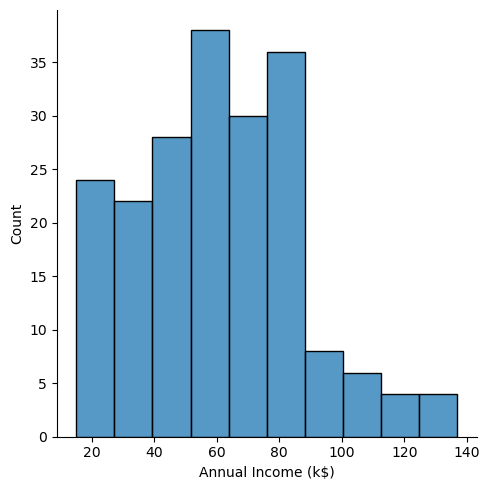

In [43]:
sns.displot(df['Annual Income (k$)']);

In [44]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

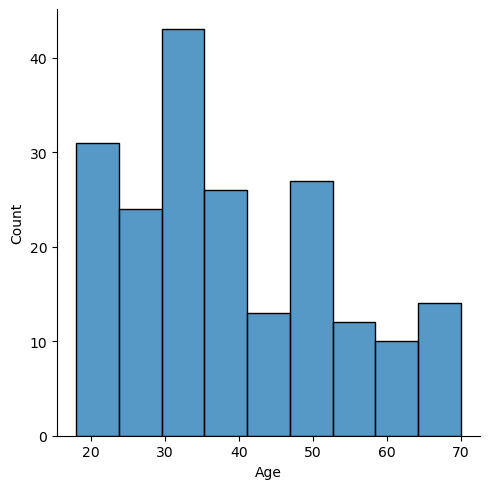

<Figure size 640x480 with 0 Axes>

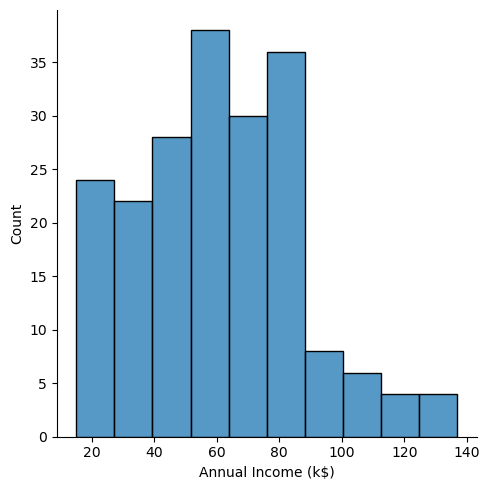

<Figure size 640x480 with 0 Axes>

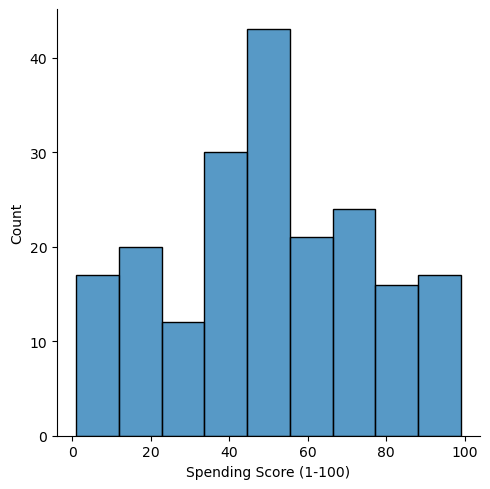

In [45]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns: 
    plt.figure()
    sns.displot(df[i])

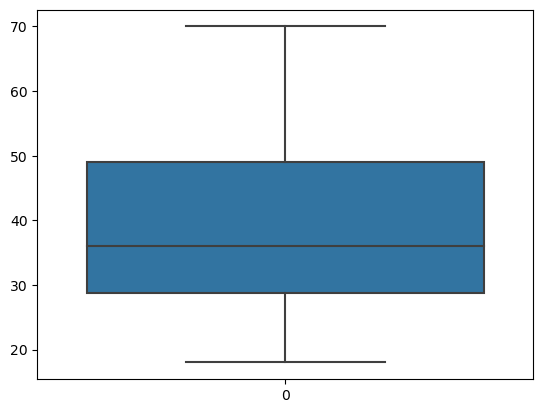

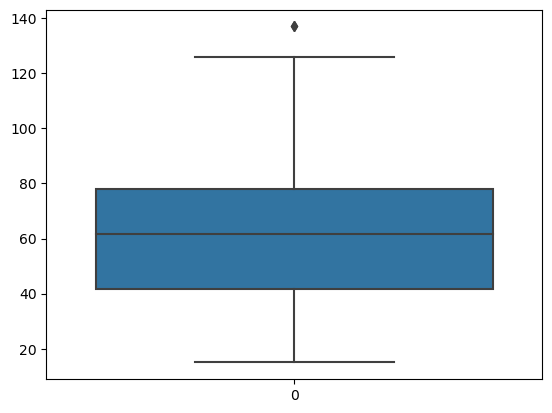

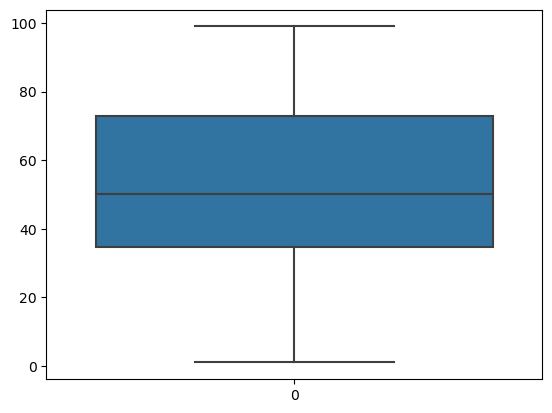

In [46]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns: 
    plt.figure()
    sns.boxplot(df[i])

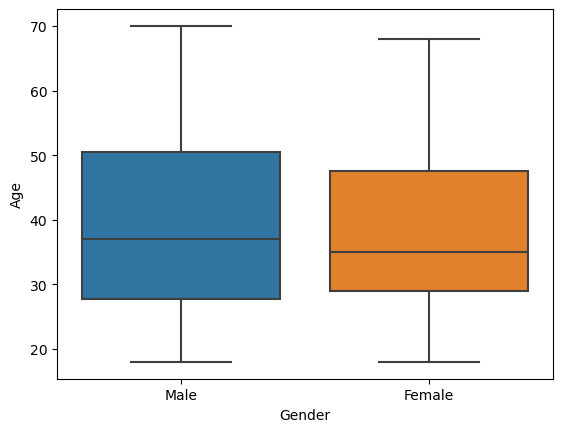

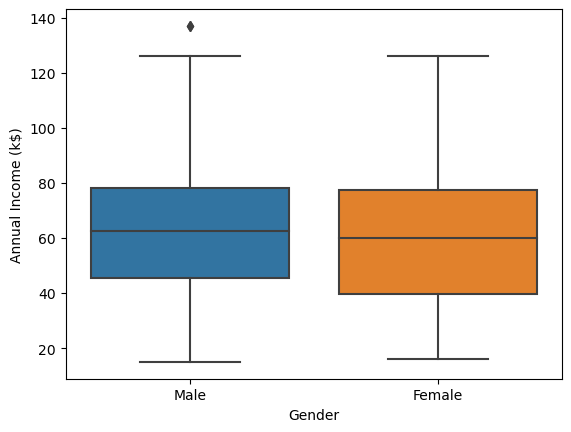

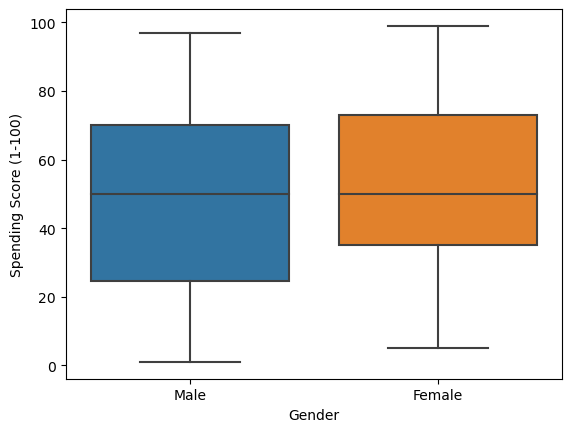

In [47]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns: 
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [48]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

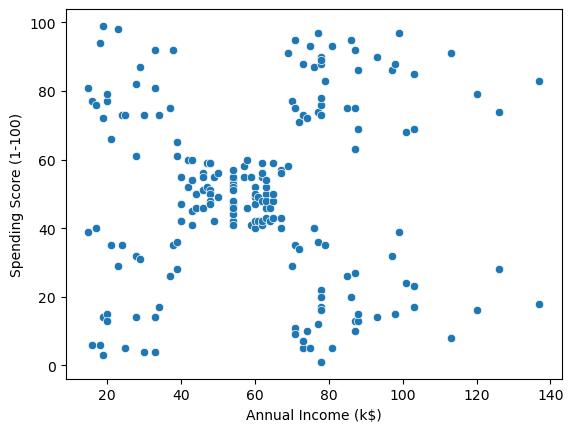

In [49]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

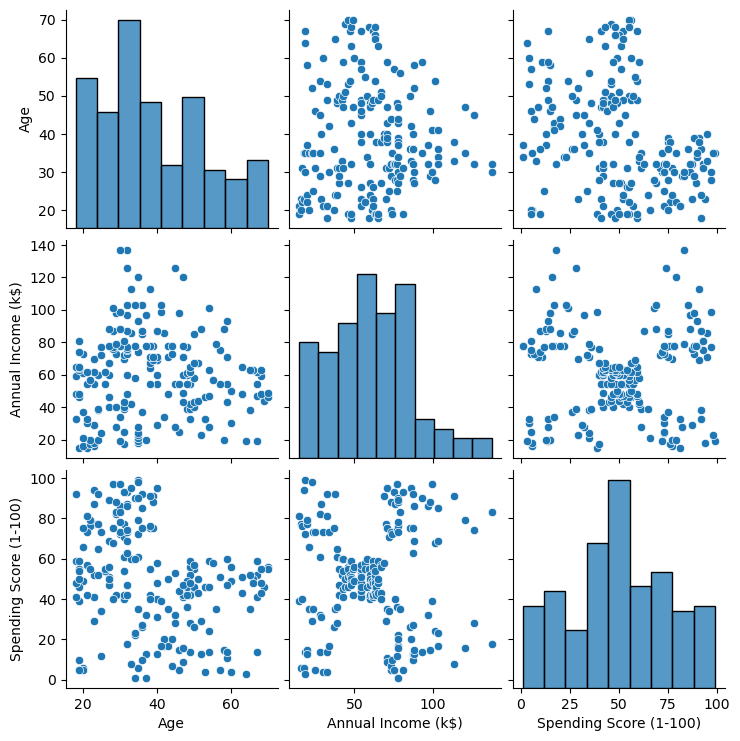

In [50]:
df = df.drop('CustomerID',axis=1)
sns.pairplot(df)

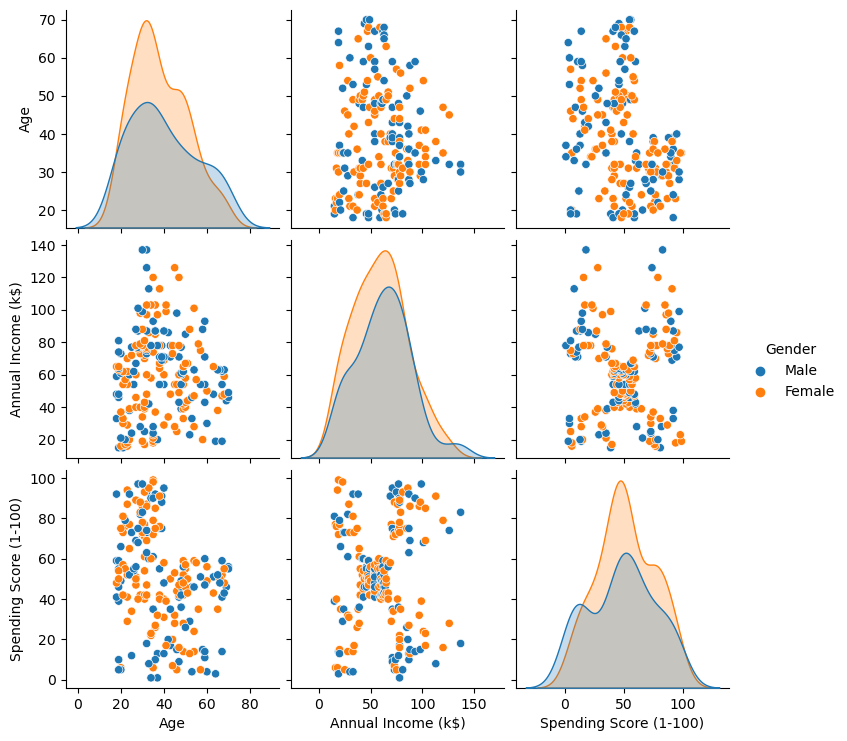

In [51]:
sns.pairplot(df,hue='Gender')

In [52]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [53]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

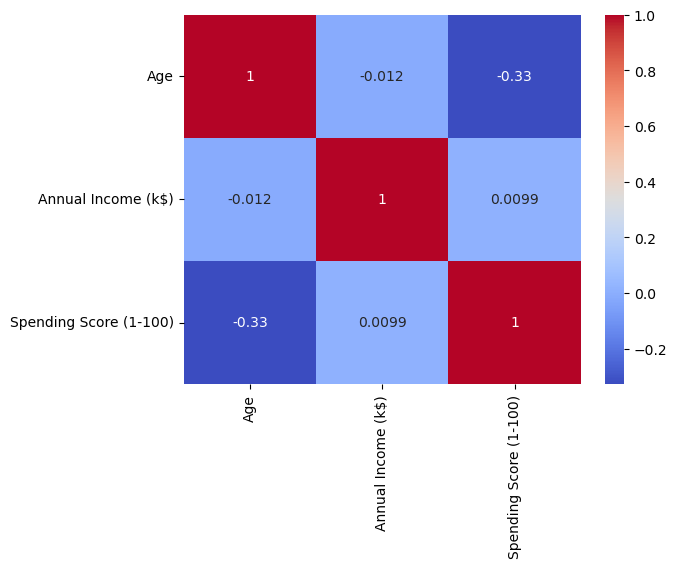

In [54]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Clustering - Univariate,Bivariate,Multivariate


In [55]:
clustering1 = KMeans(n_clusters=6)

In [56]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [57]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,4
1,Male,21,15,81,4
2,Female,20,16,6,4
3,Female,23,16,77,4
4,Female,31,17,40,4


In [58]:
df['Income Cluster'].value_counts()

2    46
5    44
0    42
4    32
1    28
3     8
Name: Income Cluster, dtype: int64

In [59]:
clustering1.inertia_

5081.484660267269

In [63]:
inertia_scores=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [64]:
inertia_scores

[137277.28000000003,
 48660.88888888888,
 23517.33093093093,
 13278.112713472487,
 8481.496190476191,
 5081.484660267269,
 3931.988095238095,
 2822.499694749695,
 2243.4656862745096,
 1758.1453823953825]

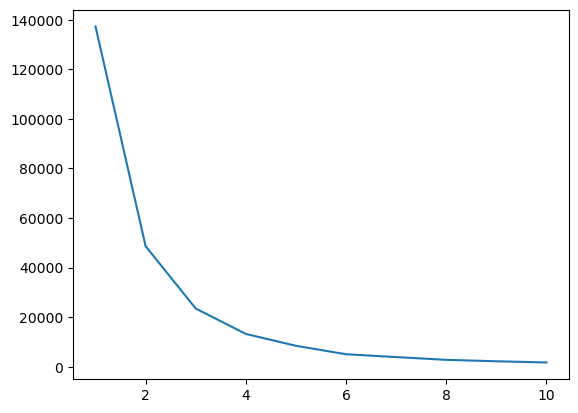

In [65]:
plt.plot(range(1,11),inertia_scores)

In [66]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [67]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,43.000000,42.238095,50.666667
1,38.214286,93.000000,50.928571
2,35.956522,74.391304,50.913043
3,36.500000,124.000000,49.625000
4,34.906250,22.000000,49.656250
5,41.613636,59.454545,49.045455


In [68]:
#bivariate clustering

In [69]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster']=clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,4,3
1,Male,21,15,81,4,2
2,Female,20,16,6,4,3
3,Female,23,16,77,4,2
4,Female,31,17,40,4,3


In [72]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

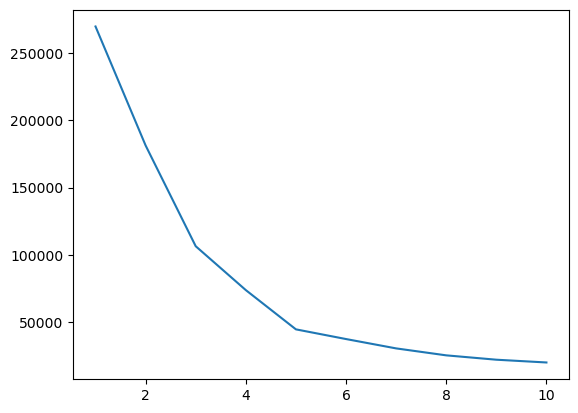

In [74]:
plt.plot(range(1,11),inertia_scores2)

In [80]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

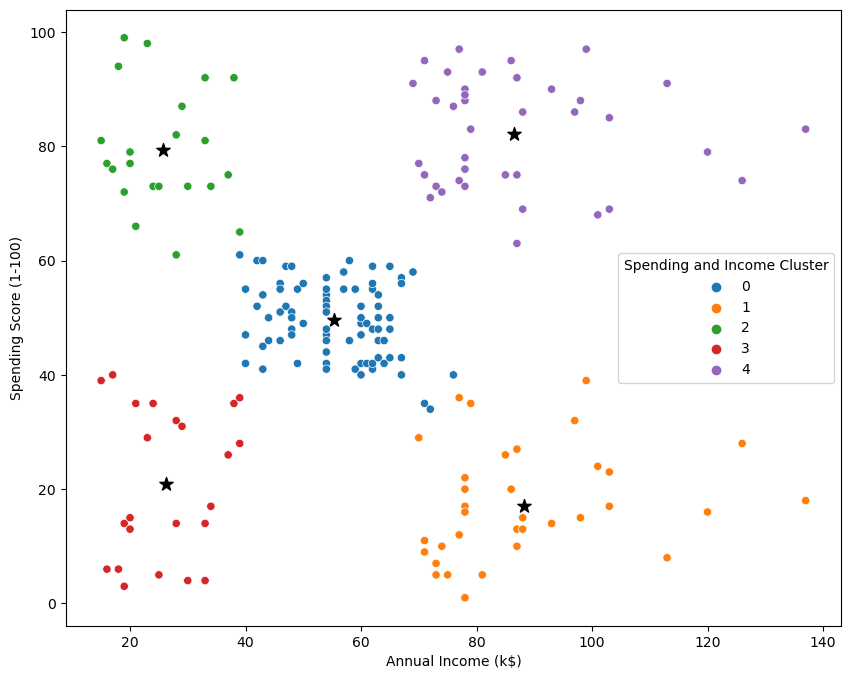

In [81]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [82]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')


Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.590909,0.409091
3,0.608696,0.391304
4,0.538462,0.461538


In [83]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,25.272727,25.727273,79.363636
3,45.217391,26.304348,20.913043
4,32.692308,86.538462,82.128205


In [84]:
#multivariate clustering

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scale = StandardScaler()

In [87]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,4,3
1,Male,21,15,81,4,2
2,Female,20,16,6,4,3
3,Female,23,16,77,4,2
4,Female,31,17,40,4,3


In [89]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,4,3,1
1,21,15,81,4,2,1
2,20,16,6,4,3,0
3,23,16,77,4,2,0
4,31,17,40,4,3,0


In [90]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [91]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [92]:
dff=scale.fit_transform(dff)

In [93]:
dff=pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [94]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
    

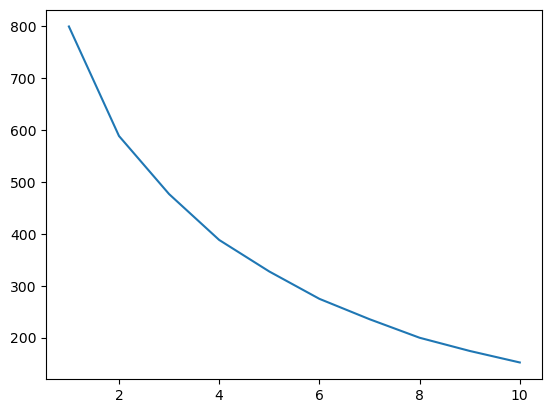

In [95]:
plt.plot(range(1,11),inertia_scores3)

In [96]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,4,3
1,Male,21,15,81,4,2
2,Female,20,16,6,4,3
3,Female,23,16,77,4,2
4,Female,31,17,40,4,3
...,...,...,...,...,...,...
195,Female,35,120,79,3,4
196,Female,45,126,28,3,1
197,Male,32,126,74,3,4
198,Male,32,137,18,3,1


In [97]:
df.to_csv('Clustering.csv')